# SeabornVisualisationProject & KNN Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


from sklearn import metrics


from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.utils import resample

In [2]:
iris = pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.drop("Id",axis=1,inplace=True) # we can use index_col="Id" to avoid redendency 

## The analysis:
wa're gonna describe the data and try to extract useful information 

disribution:

In [4]:
iris.describe()
# we don't have any missing values 
# we notice that we can distingue between SepalLengthCm and PetalLengthCm
# since the mean is different
# SepalWidthCm	PetalLengthCm are very similar (doesn't give much info)
# in a nutshall PetalWidthCm SepalLengthCm are gonna be halpful 
#min and max

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


we will see if the data is balanced ( the percentage of appearence of each species)

the modal of classification depends on the quality of our data 

In [5]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

the dataset is clean and balanced

### corralation:

In [6]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


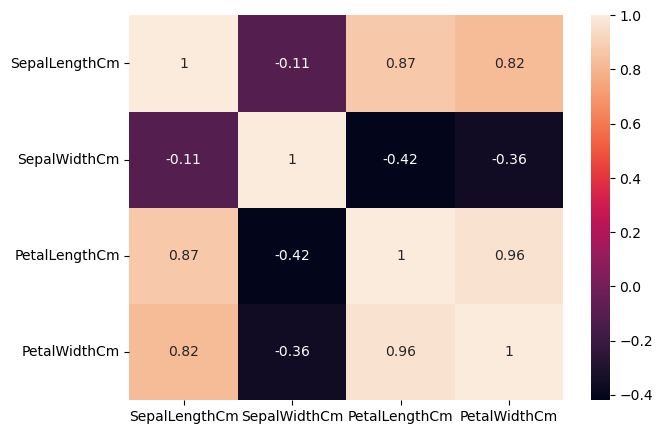

In [7]:
#seaborn
plt.figure(figsize=(7,5))
sns.heatmap(iris.corr(),annot=True)
plt.show()
# notice we use corrolation bfr classification
# to eleminate certain useless variables 

In [8]:
iris.groupby('Species').mean()
#we can note that
# Iris-setosa can be distingued by PeralLengthCm and PetalWidthCm

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


## Visualisation:

### KDE: 
#### Univariate :

In [9]:
setosa = iris[iris['Species']=='Iris-setosa']

In [10]:
columns = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']   
columns

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

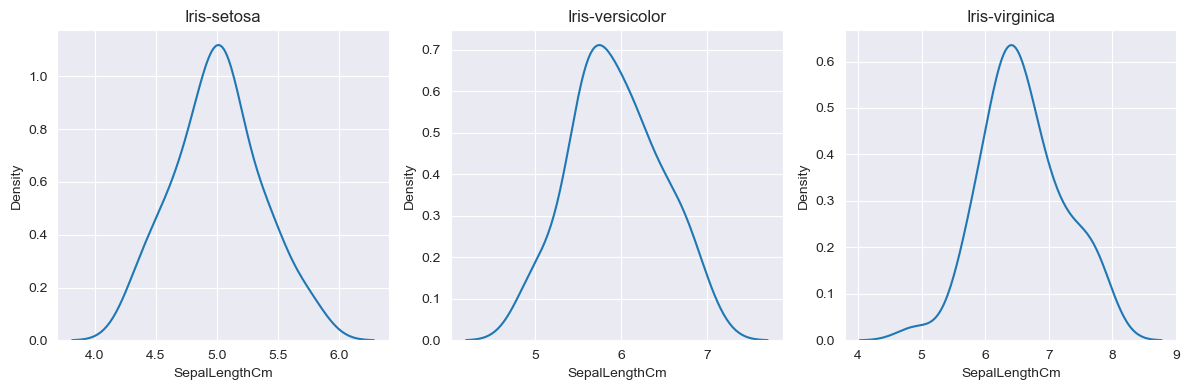

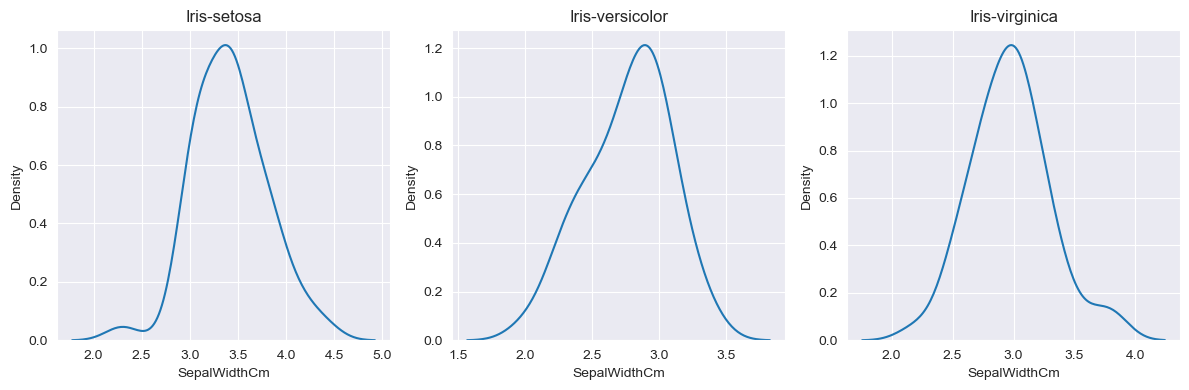

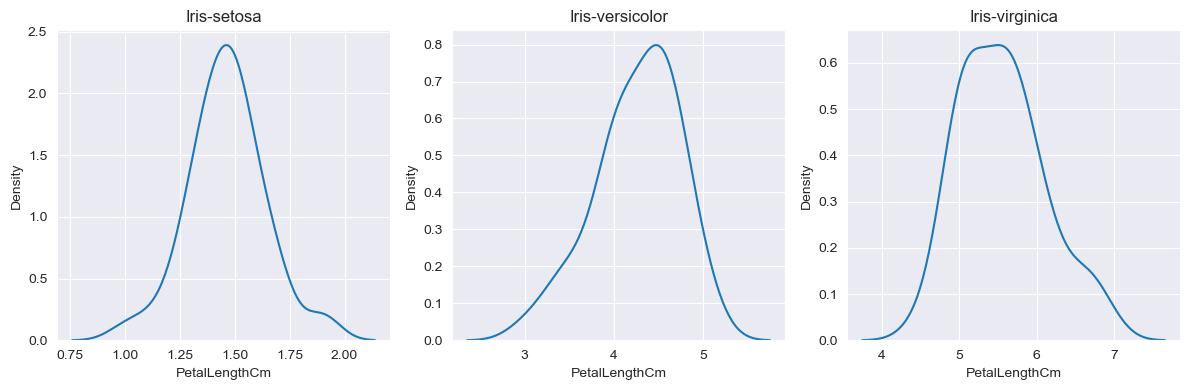

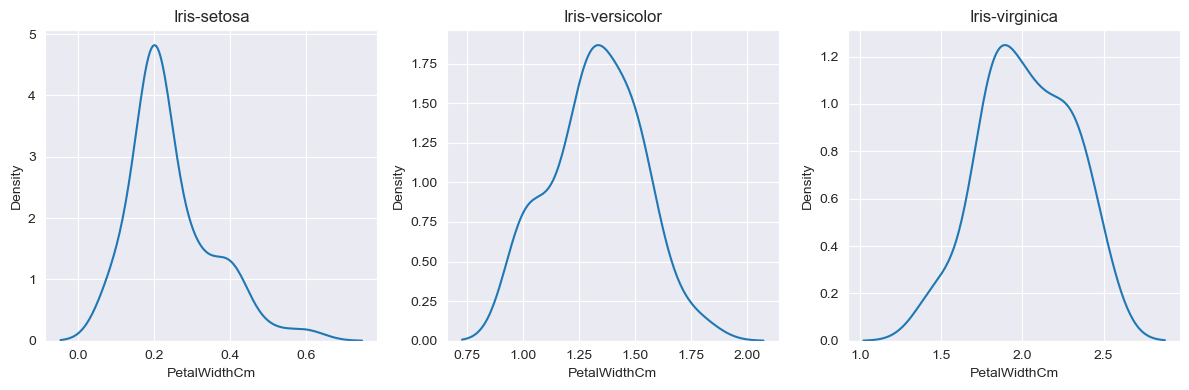

In [11]:
def plot_kde(feature):
    
    fig, axes = plt.subplots(1, len(columns), figsize=(12, 4))
    
    for i, col in enumerate(columns):
        data = iris[iris['Species'] == col]
        sns.kdeplot(data=data[feature], ax=axes[i])# shade= True, , bw=5
        axes[i].set_title(col)
    plt.tight_layout()
    plt.show()

sns.set_style('darkgrid')

features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for feature in features:
    plot_kde(feature)


### bivariate:

In [12]:
setosa.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


(1.0, 2.0)

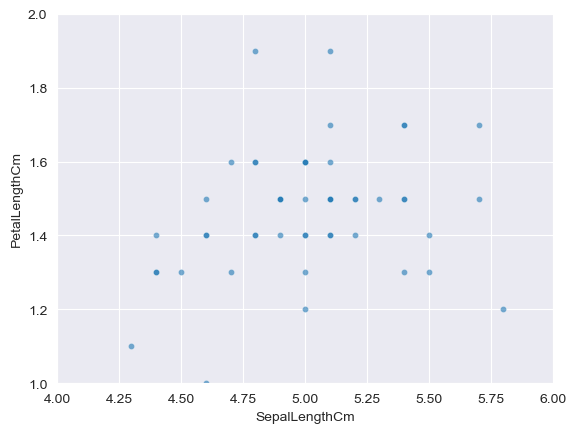

In [13]:
sns.scatterplot(x=setosa.SepalLengthCm,y=setosa.PetalLengthCm, alpha= 0.6, s=20)
plt.xlim(4, 6)
plt.ylim(1, 2)

<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

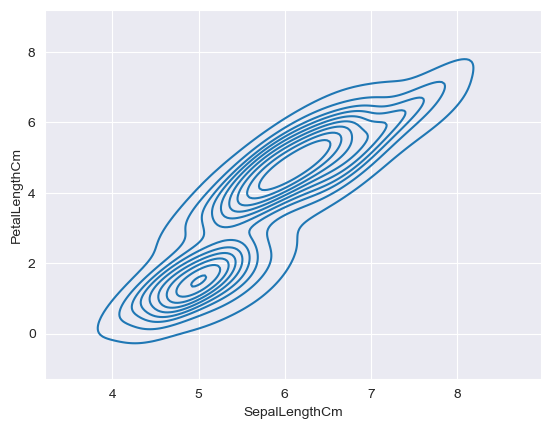

In [14]:
sns.kdeplot(x=iris.SepalLengthCm,y=iris.PetalLengthCm) # n_levels , shade= True, shade lowest= False

<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

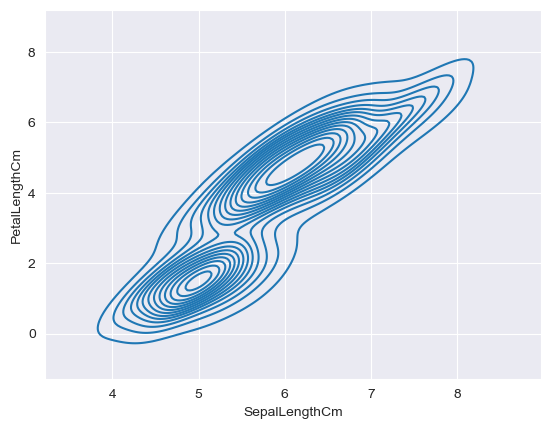

In [15]:
sns.kdeplot(x=iris.SepalLengthCm,y=iris.PetalLengthCm, n_levels= 15)

<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

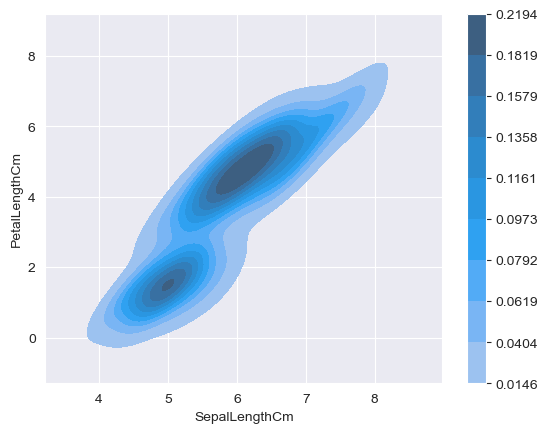

In [16]:
sns.kdeplot(x=iris.SepalLengthCm,y=iris.PetalLengthCm, shade= True, cbar= True)

#### bivariate KDEplot by category 

In [17]:
sns.set_style('whitegrid')
columns

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [18]:
setosa = iris[iris['Species']=='Iris-setosa']
versicolor= iris[iris['Species']=='Iris-versicolor']
virginica = iris[iris['Species']=='Iris-virginica']

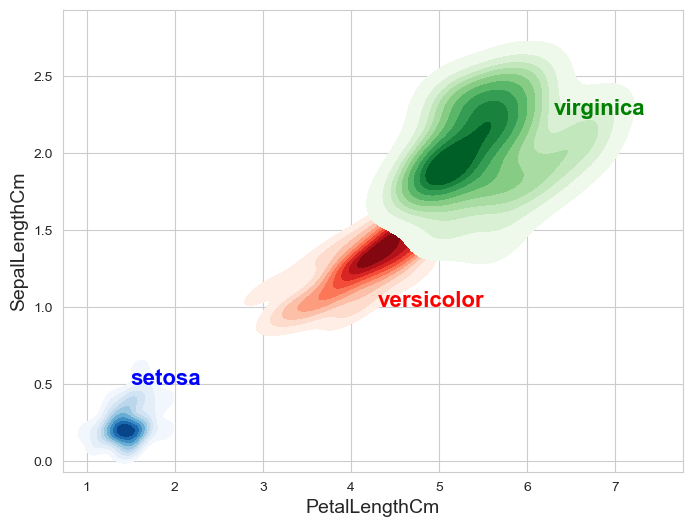

In [19]:

plt.figure(figsize=(8, 6))

sns.kdeplot(data=setosa, x="PetalLengthCm", y="PetalWidthCm", cmap="Blues", shade=True, thresh=0.05)
sns.kdeplot(data=versicolor, x="PetalLengthCm", y="PetalWidthCm", cmap="Reds", shade=True, thresh=0.05)
sns.kdeplot(data=virginica, x="PetalLengthCm", y="PetalWidthCm", cmap="Greens", shade=True, thresh=0.05)

plt.xlabel('PetalLengthCm', fontsize=14)
plt.ylabel('SepalLengthCm', fontsize=14)

plt.annotate("setosa", (1.5,0.5), color='blue', fontsize=16, fontweight='bold')
plt.annotate("versicolor", (4.3, 1), color='red', fontsize=16, fontweight='bold')
plt.annotate("virginica", (6.3, 2.25), color='green', fontsize=16, fontweight='bold')

plt.show()



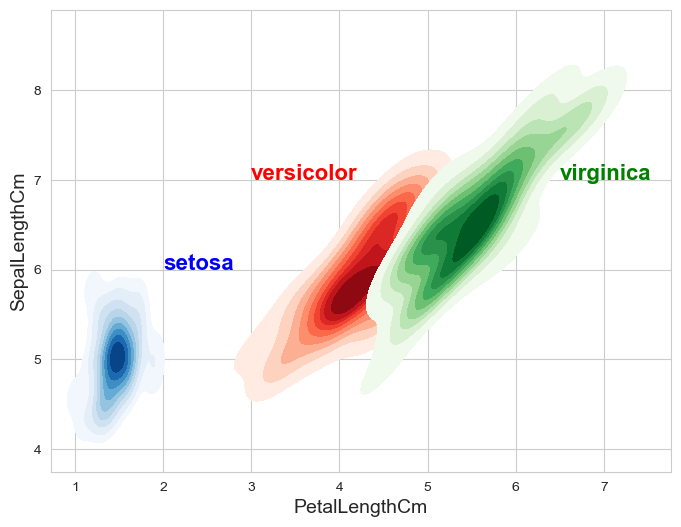

In [20]:
plt.figure(figsize=(8, 6))

sns.kdeplot(data=setosa, x="PetalLengthCm", y="SepalLengthCm", cmap="Blues", shade=True, thresh=0.05)
sns.kdeplot(data=versicolor, x="PetalLengthCm", y="SepalLengthCm", cmap="Reds", shade=True, thresh=0.05)
sns.kdeplot(data=virginica, x="PetalLengthCm", y="SepalLengthCm", cmap="Greens", shade=True, thresh=0.05)

plt.xlabel('PetalLengthCm', fontsize=14)
plt.ylabel('SepalLengthCm', fontsize=14)

plt.annotate("setosa", (2,6 ), color='blue', fontsize=16, fontweight='bold')
plt.annotate("versicolor", (3, 7), color='red', fontsize=16, fontweight='bold')
plt.annotate("virginica", (6.5, 7), color='green', fontsize=16, fontweight='bold')

plt.show()

#### Scatter Plot:

Text(0.5, 1.0, 'sepal length/ Petal width')

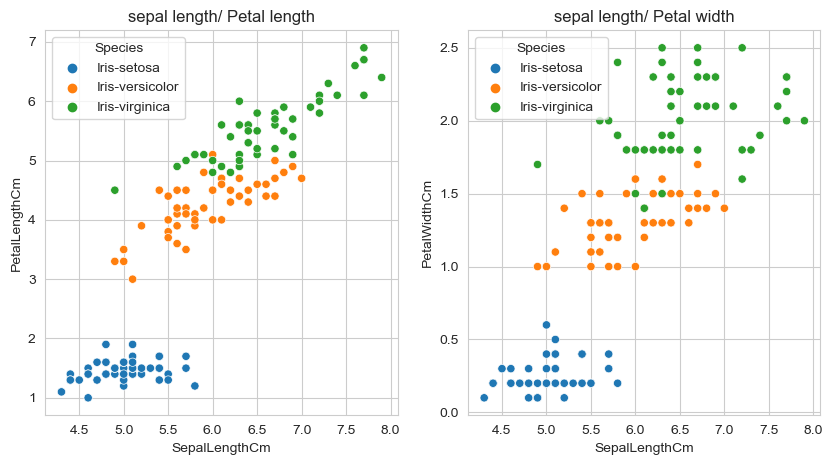

In [21]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.scatterplot(data=iris, x='SepalLengthCm', y='PetalLengthCm', hue='Species')
plt.title("sepal length/ Petal length")
plt.subplot(1,2,2)

sns.scatterplot(data=iris, x='SepalLengthCm', y='PetalWidthCm', hue='Species')
plt.title("sepal length/ Petal width")

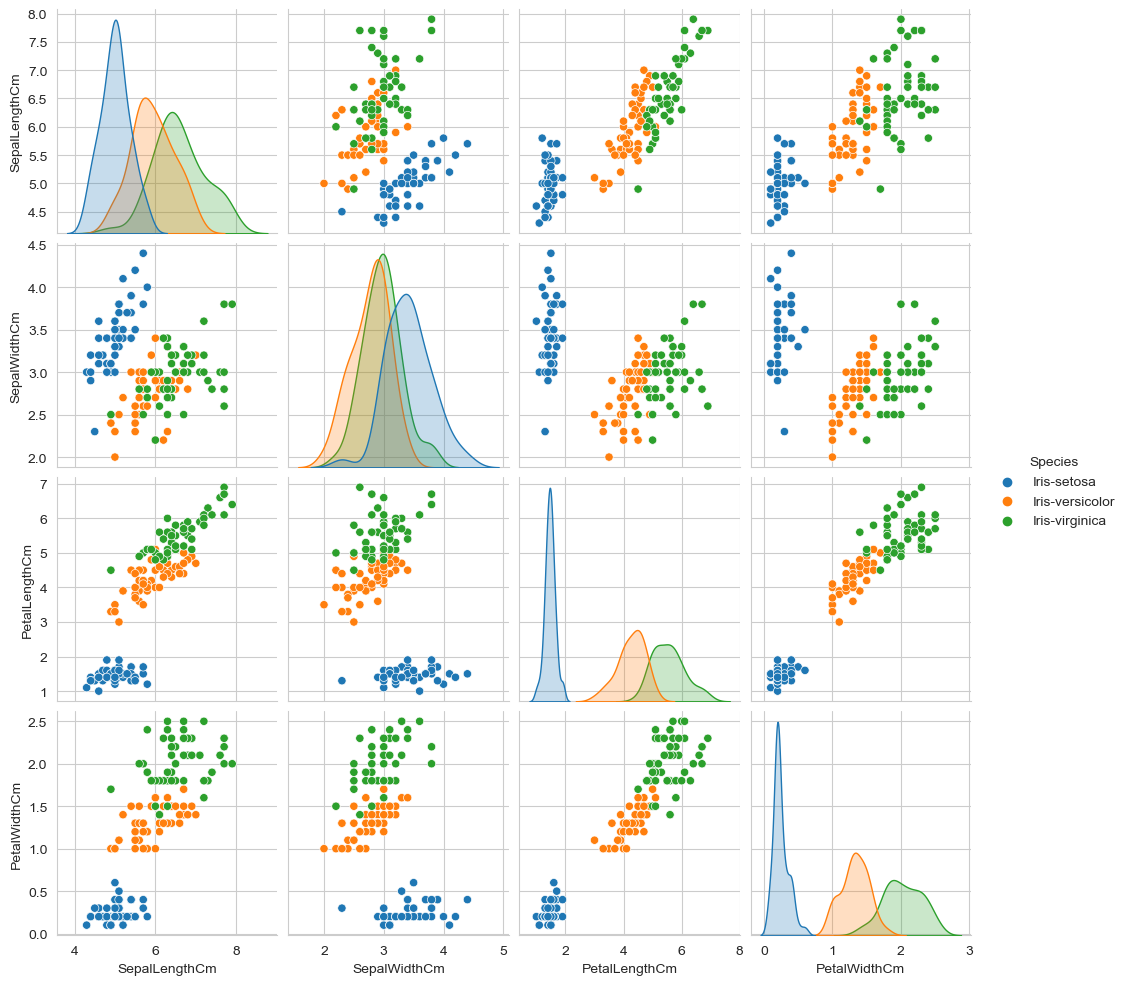

In [22]:
sns.pairplot(data=iris, hue='Species')

#### ViolinPlot

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

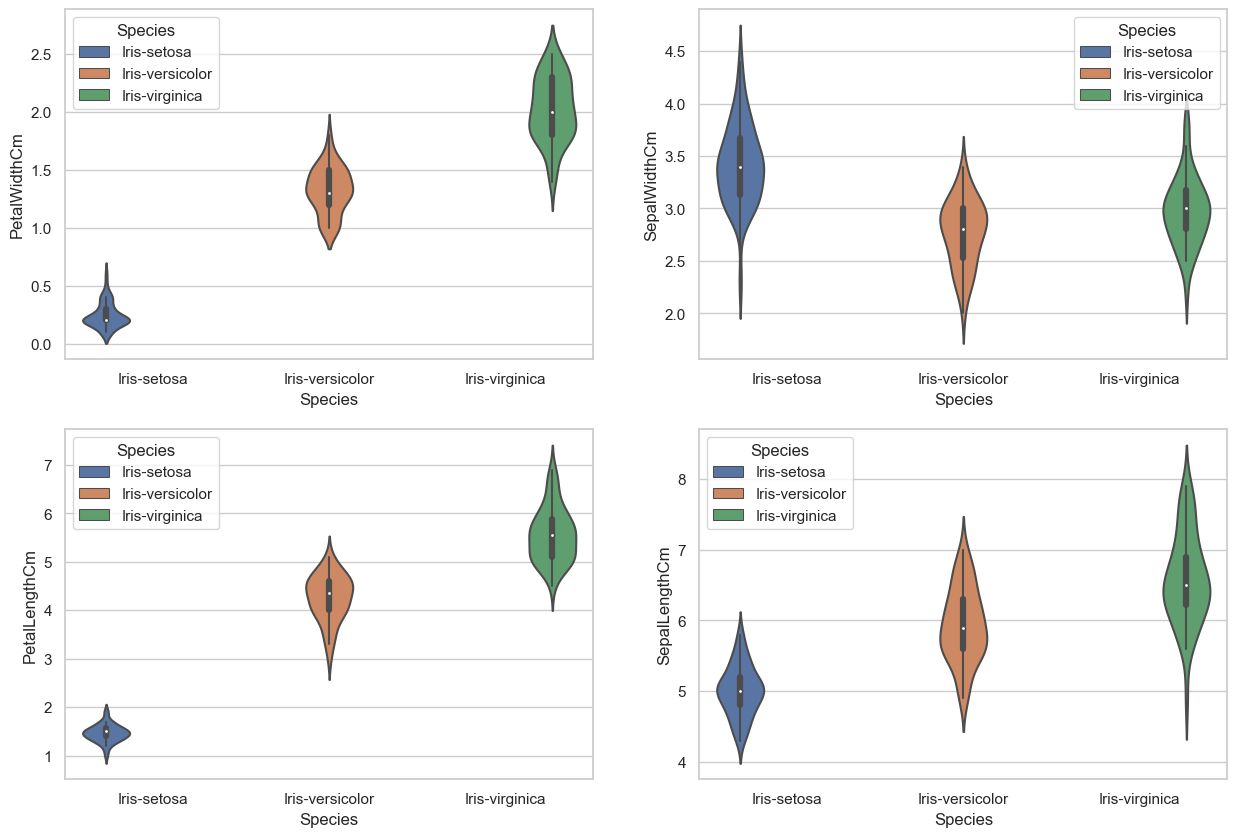

In [23]:

sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2,2, figsize=(15,10)) #, palette="Set3", bw=.2, cut=1, linewidth=1
sns.violinplot(ax=axes[0,0],x="Species", y="PetalWidthCm",data=iris, hue="Species")
sns.violinplot(ax=axes[1,0],x="Species", y="PetalLengthCm",data=iris, hue="Species")
sns.violinplot(ax=axes[0,1],x="Species", y="SepalWidthCm",data=iris, hue="Species")
sns.violinplot(ax=axes[1,1],x="Species", y="SepalLengthCm",data=iris, hue="Species")

## Data Preparation

In [24]:
iris2 = iris.copy()
labels= iris2['Species']
iris2.drop(['Species'], inplace= True, axis= 1)
iris2.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
labels.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### Subdivision into testing and training 

In [26]:
iris_train, iris_test, labels_train, labels_test = train_test_split(iris2,labels, test_size=0.3, random_state=26)

# Classification:

In [27]:
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [28]:
parameters = {'n_neighbors':np.arange(1,10,2), 'p' : np.arange(1,4,1)} # pas de 2 pour ne garder que les pas impaires
knn=KNeighborsClassifier()
clf = GridSearchCV(estimator=knn, param_grid=parameters, return_train_score=True)
clf.fit(iris_train,labels_train)
knn=KNeighborsClassifier(**clf.best_params_)
knn.fit(iris_train,labels_train)


KNeighborsClassifier(n_neighbors=9, p=3)

In [29]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
14,0.000000,0.000000,0.002008,0.004016,9,3,"{'n_neighbors': 9, 'p': 3}",1.000000,1.0,1.000000,...,0.980952,0.023328,1,0.988095,0.988095,0.976190,1.000000,0.988095,0.988095,0.007529
8,0.000907,0.001814,0.000000,0.000000,5,3,"{'n_neighbors': 5, 'p': 3}",0.952381,1.0,1.000000,...,0.971429,0.023328,2,0.976190,0.964286,0.976190,1.000000,0.976190,0.978571,0.011664
11,0.000907,0.001814,0.000000,0.000000,7,3,"{'n_neighbors': 7, 'p': 3}",0.952381,1.0,1.000000,...,0.971429,0.023328,2,0.988095,0.988095,0.976190,1.000000,0.976190,0.985714,0.008909
13,0.000000,0.000000,0.004058,0.006107,9,2,"{'n_neighbors': 9, 'p': 2}",1.000000,1.0,1.000000,...,0.971429,0.038095,2,0.976190,0.976190,0.976190,0.988095,0.988095,0.980952,0.005832
9,0.001108,0.002215,0.002028,0.004055,7,1,"{'n_neighbors': 7, 'p': 1}",1.000000,1.0,0.952381,...,0.961905,0.035635,5,0.964286,0.964286,0.964286,0.988095,0.976190,0.971429,0.009524


In [30]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Accuracy :  0.9555555555555556
F1-score KNN :  0.9569444444444445


Text(0.5, 1.0, 'Confusion matrix')

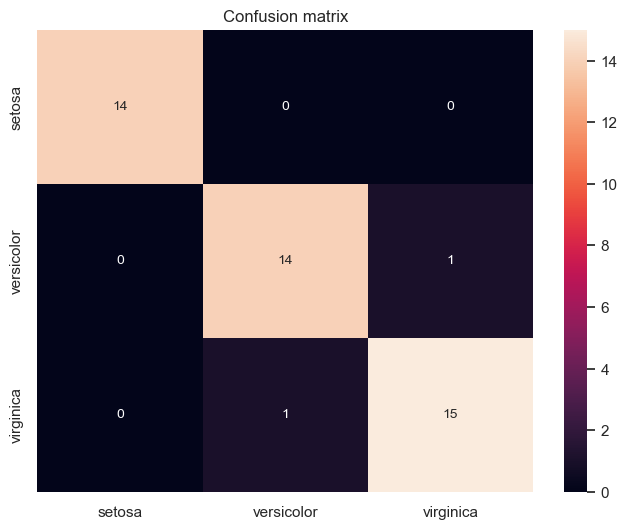

In [31]:
yknn=knn.predict(iris_test)
print("Accuracy : ",metrics.accuracy_score(labels_test, yknn))
print("F1-score KNN : ",metrics.f1_score(labels_test, yknn, average='macro'))

plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(labels_test, yknn), annot=True, annot_kws={"size": 10}, yticklabels=["setosa", "versicolor", "virginica"], xticklabels=["setosa", "versicolor", "virginica"])
plt.title('Confusion matrix')

In [32]:

iris2.head()
iris2.drop(['SepalWidthCm'],axis= 1)

,SepalLengthCm,PetalLengthCm,PetalWidthCm
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2
...,...,...,...
145,6.7,5.2,2.3
146,6.3,5.0,1.9
147,6.5,5.2,2.0
148,6.2,5.4,2.3


In [33]:
iris2_train, iris2_test, labels2_train, labels2_test = train_test_split(iris2,labels, test_size=0.3, random_state=23)

In [34]:
parameters = {'n_neighbors':np.arange(1,10,2), 'p' : np.arange(1,4,1)} # pas de 2 pour ne garder que les pas impaires
knn=KNeighborsClassifier()
clf = GridSearchCV(estimator=knn, param_grid=parameters, return_train_score=True)
clf.fit(iris2_train,labels2_train)
knn=KNeighborsClassifier(**clf.best_params_)
knn.fit(iris2_train,labels2_train)

KNeighborsClassifier(n_neighbors=7, p=3)

In [35]:
pd.DataFrame(clf.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
11,0.002402,0.004803,0.001210,0.002420,7,3,"{'n_neighbors': 7, 'p': 3}",0.952381,0.952381,1.000000,...,0.971429,0.023328,1,0.988095,0.976190,0.976190,0.964286,0.988095,0.978571,0.008909
10,0.000000,0.000000,0.000000,0.000000,7,2,"{'n_neighbors': 7, 'p': 2}",0.904762,0.952381,1.000000,...,0.961905,0.035635,2,0.988095,0.964286,0.952381,0.952381,0.976190,0.966667,0.013883
13,0.004004,0.004904,0.003146,0.006292,9,2,"{'n_neighbors': 9, 'p': 2}",0.904762,0.952381,1.000000,...,0.961905,0.035635,2,0.976190,0.964286,0.952381,0.952381,0.964286,0.961905,0.008909
14,0.002013,0.004025,0.001219,0.002438,9,3,"{'n_neighbors': 9, 'p': 3}",0.904762,0.952381,1.000000,...,0.961905,0.035635,2,0.988095,0.976190,0.964286,0.976190,0.964286,0.973810,0.008909
12,0.003156,0.006312,0.003855,0.003825,9,1,"{'n_neighbors': 9, 'p': 1}",0.904762,0.952381,0.952381,...,0.952381,0.030117,5,0.976190,0.952381,0.952381,0.940476,0.964286,0.957143,0.012141


Accuracy :  1.0
F1-score KNN :  1.0


Text(0.5, 1.0, 'Confusion matrix')

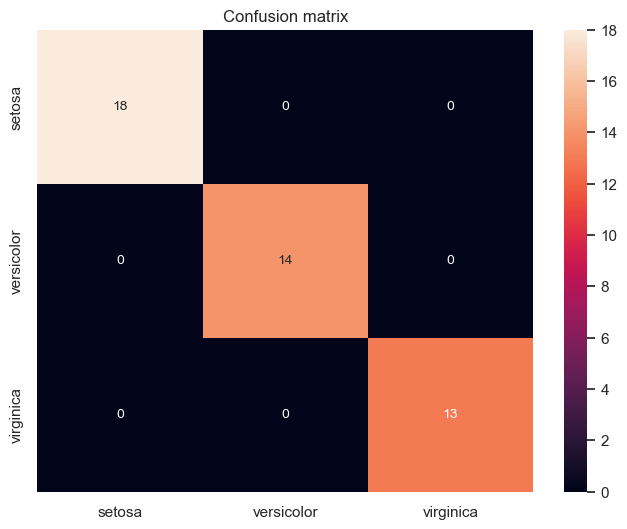

In [48]:
yknn=knn.predict(iris2_test)
print("Accuracy : ",metrics.accuracy_score(labels2_test, yknn))
print("F1-score KNN : ",metrics.f1_score(labels2_test, yknn, average='macro'))

plt.figure(figsize=(8,6))
sns.heatmap(metrics.confusion_matrix(labels2_test, yknn), annot=True, annot_kws={"size": 10}, yticklabels=["setosa", "versicolor", "virginica"], xticklabels=["setosa", "versicolor", "virginica"])
plt.title('Confusion matrix')

## THE END 